In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")

### Review of lecture 23

We learned a bit about matrix math

#### In this lecture we will:

- Learn how to plot great and small circles on an equal area net and map projections. 


### Plotting a great circle

In Lecture 22, we learned how to plot directions on equal area and equal angle plots.  Then in Lecture 23, we learned how to calculate the angle between two vectors (using the dot product) and the pole to a plane containing two vectors (using the cross product).  Now, we want to plot the trace of the plane on our equal area net (and it better pass through the two points!).    

Take a look at the module **nets** and you will notice the two functions **EqualArea( )** and **EqualAngle( )** from Lecture 22.


Let's re-create our equal area diagram, plot two directions, and plot the pole to the plane containing both directions.

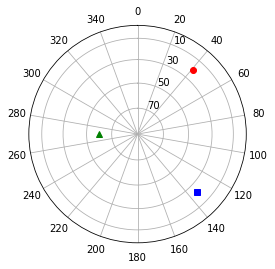

In [3]:
import nets as nets # load up the net module
Azs=np.array([40.9,134.1,270.]) # make an array of azimuths
Pls=np.array([20.7,22.5,60.]) # same for plunges
Azs=np.radians(Azs) # convert the azimuths to plunges


fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid


# nets.EqualArea() converts the plunges to plot coordinates
plt.polar(Azs[0],nets.EqualArea(Pls)[0],'ro') # put on the azimuths and plunges
plt.polar(Azs[1],nets.EqualArea(Pls)[1],'bs') # second one as a blue square
plt.polar(Azs[2],nets.EqualArea(Pls)[2],'g^') # third one as a green triangle
# put on the azimuth lines
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
# make the plunge circles and labels
list1=[nets.EqualArea(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2);

Now, we want to plot the trace of the plane onto the net. We may want to calculate this again, so let's write a function.  Basically we want to calculate a bunch of points in the plane that trace out the plane in net coordinates.  

This function **pts_on_a_plane( )** will do the trick. The function also calculates small circles. 

In [4]:
# set up rotation matrix
def pts_on_a_plane(pole,gamma):
    """
    Calculates directions gamma angle away from a pole.
    
    Inputs: 
    pole: array of azimuth and plunge of the pole
    gamma: desired angle away from the pole
    
    Returns: 
    PTS:  the points on the plane
    """
    
    gamma=np.radians(gamma) # convert gamma to radians
    t=np.zeros((3,3)) # set up a rotation matrix, initialized with zeros.
    t[2]=nets.dir2cart(pole) # assigns the cartesian coordinates of pole to t[2]
    plane1=[pole[0],pole[1]-90.] #  one vector orthogonal to the pole, in the plane
    plane2=[pole[0]+90.,0] # a vector orthogonal to both the pole and plane1
    t[0]=nets.dir2cart(plane1) # assigns this vector's cartesian coordinates to t[0]
    t[1]=nets.dir2cart(plane2)# assigns this vector's cartesian coordinates to t[1]
    t=t.transpose() # takes the transpose
# set up v
    npts=201 # number of points we want in the plane
    xnum=float(npts-1.)/2.
    v=[0,0,0]
    PTS=[] # make a list to keep the data points
    for i in range(npts):  # incremental point along plane
            psi=float(i)*np.pi/xnum
            v[0]=np.sin(gamma)*np.cos(psi)
            v[1]=np.sin(gamma)*np.sin(psi)
            if gamma==np.pi/2.:
                v[2]=0.
            else:
                v[2]=np.sqrt(1.-v[0]**2 - v[1]**2)
            elli=[0,0,0]
# calculate points on the ellipse
            for j in range(3):
                for k in range(3):
                    elli[j]=elli[j] + t[j][k]*v[k]  # cartesian coordinate j of ellipse
            PTS.append(nets.cart2dir(elli))
    return PTS


Now down to "bidness".  We want to plot the points on our equal area projection 

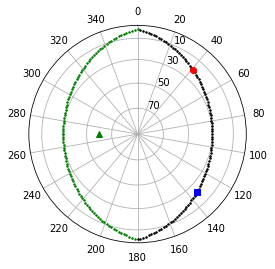

In [5]:
pole=[270.,60.] # direction of the pole (green triangle)
PTS=pts_on_a_plane(pole,90.) # get the points in the plane orthogonal to the pole
# same as it ever was
fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid

# now for the points on the plane
for pt in PTS: # step through the points
    if pt[1]<0: # make yellow dots in the upper hemisphere
        plt.polar(np.radians(pt[0]),nets.EqualArea(-pt[1]),'g.',markersize=3)
    else: # make black dots in the lower hemisphere. 
        plt.polar(np.radians(pt[0]),nets.EqualArea(pt[1]),'k.',markersize=3)
        
# put back on the old stuff
plt.polar(Azs[0],nets.EqualArea(Pls)[0],'ro')
plt.polar(Azs[1],nets.EqualArea(Pls)[1],'bs')
plt.polar(Azs[2],nets.EqualArea(Pls)[2],'g^')
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
list1=[nets.EqualArea(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2)
plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)]);


Whew!  The great circle representing the trace of the plane containing the glacial striations went right through the points representing the striation directions (as it must!).  



Now that we can draw great (and small) circles on projections, it is interesting to compare distortions in various 2D projections of 3D information.  Let's start by comparing the equal area versus equal angle projections.  We can draw a direction with a circle of confidence around it on both projections to see how each behaves.  Starting with the equal area projection, let's draw a few directions with 15$^{\circ}$ circles of 95% confidence ($\alpha_{95}$). 

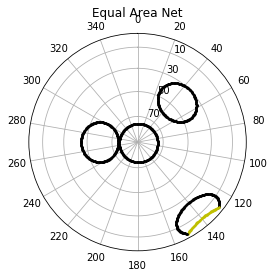

In [6]:
poles=[[270.,60.],[45,45],[135,89],[140,10]] #poles
a95=15. # circle of confidence
# old stuff
fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid
for pole in poles: # step through the list of poles
    PTS=pts_on_a_plane(pole,a95) # get the points a95 away from this pole
    for pt in PTS:
        if pt[1]<0:
            plt.polar(np.radians(pt[0]),nets.EqualArea(-pt[1]),'y.',markersize=3)
        else:
            plt.polar(np.radians(pt[0]),nets.EqualArea(pt[1]),'k.',markersize=3)
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
list1=[nets.EqualArea(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2)
plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
plt.title('Equal Area Net');



And the same for the equal angle plot:

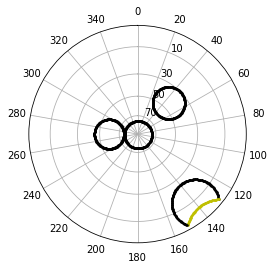

In [7]:
poles=[[270.,60.],[45,45],[135,89],[140,10]]
a95=15.
fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid
for pole in poles:
    PTS=pts_on_a_plane(pole,a95)
    for pt in PTS:
        if pt[1]<0:
            plt.polar(np.radians(pt[0]),nets.EqualAngle(-pt[1]),'y.',markersize=3)
        else:
            plt.polar(np.radians(pt[0]),nets.EqualAngle(pt[1]),'k.',markersize=3)
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
list1=[nets.EqualAngle(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2)
plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)]);




Aha!  The equal angle plot plots actual  circles while the equal area plot plots ovals! But the circles in the equal angle plots are all different sizes while the areas of the ovals are the same size.  This just demonstrates the pros and cons of each type of plot.  

Now let's look at some of our map projections and how they perform with respect to distortions.  And yes, once you have the points on the circles, you can plot them on a map, too. 

Here's the mercator projection with a 15$^{\circ}$ circles drawn around San Diego and a around some point in Siberia.   Look at the lecture on maps if you have forgotten how to do this:

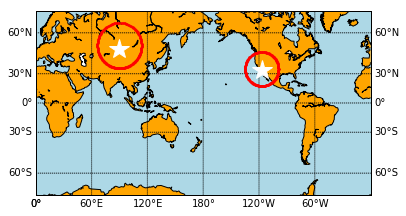

In [8]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.fillcontinents(color='orange')
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True])
m.drawmapboundary(fill_color='lightblue')
San_lat=33
San_lon=243
circ=15.
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20) # put San Diego on
PTS=pts_on_a_plane([San_lon,San_lat],circ) # get the points on the circle

for pt in PTS: # step through the points
    x,y=m(pt[0],pt[1]) # convert to map coordinates
    plt.plot(x,y,'r.',markersize=3) # plot as tiny red dots

# same for some point in Siberia
x,y=m(90,50)
plt.plot(x,y,'w*',markersize=20)
PTS=pts_on_a_plane([90,50],circ)
for pt in PTS:
    x,y=m(pt[0],pt[1])
    plt.plot(x,y,'r.',markersize=3)






Compare that with the distortion of a Hammer projection:

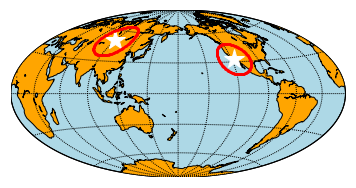

In [9]:
m = Basemap(projection='hammer',lon_0=180)
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='lightblue')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawmapboundary(fill_color='lightblue')
San_lat=33
San_lon=243
circ=15.
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20)
PTS=pts_on_a_plane([San_lon,San_lat],circ)
for pt in PTS:
    x,y=m(pt[0],pt[1])
    plt.plot(x,y,'r.',markersize=3)

x,y=m(90,50)
plt.plot(x,y,'w*',markersize=20)
PTS=pts_on_a_plane([90,50],circ)
for pt in PTS:
    x,y=m(pt[0],pt[1])
    plt.plot(x,y,'r.',markersize=3);



One squishes horizontally while the other squishes vertically. 

One more thing - recall the lecture when we looked at P and S wave arrivals and calculated the great circle distance between the source and receiver?  There was this map: 

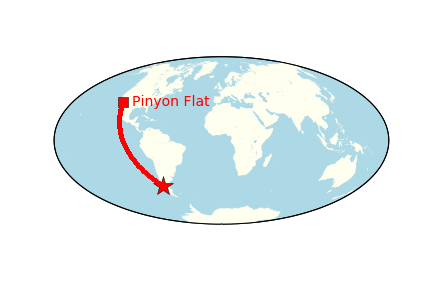

In [10]:
Image(filename='Figures/greatCirc.png')

Now  you can make this map yourself putting together tricks from finding the pole to two vectors, finding the great circle using spherical trigonometry and plotting the line on a Hammer projection.  

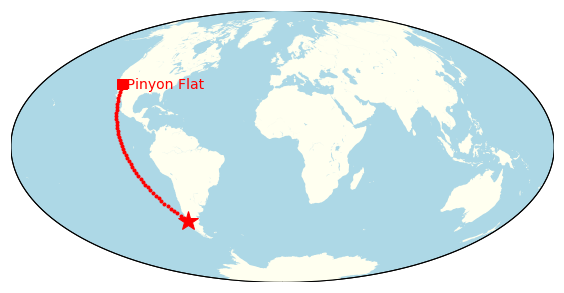

In [15]:
def find_pole(pt1,pt2):
    """
    Calculate the pole for two vectors
    
    inputs:
        pt1-  [Azimuth, plunge] a list containing the azimuth
                                and plunge of the first point
        pt2-  [Azimuth, plunge] a list containing the azimuth 
                                and plunge of the second point
    returns:
             [Azimuth, plunge] of the pole 
    """
    vec1=nets.dir2cart(pt1)
    vec2=nets.dir2cart(pt2)
    pole=np.cross(vec1,vec2)
    return nets.cart2dir(pole)

def great_circle(lat_1,lon_1,lat_2,lon_2):
    """
    inputs:
       lat_1 - latitude of the starting point in degrees
       lon_1 - longitude of the starting point in degrees
       lat_2 - latitude of the ending point in degrees
       lon_2 - longitude of the ending point in degrees
       
    returns:
       great circle distance between the two points
       
    """
    # first we have to convert the latitudes to colatitudes:
    colat_1,colat_2=90.-lat_1,90.-lat_2
    # and alpha is the difference betwee the two longitudes
    alpha=(lon_2-lon_1)%360
    # Then lets make life easy on us and convert degrees to radians
    colat_1,colat_2,alpha= np.radians(colat_1),\
              np.radians(colat_2),np.radians(alpha)# continued line from above
    a=np.arccos(np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha))
    # remember to convert back to degrees! 
    return np.degrees(a)  


plt.figure(1,(10,5)) # make a nice big plot

PF_lat,PF_lon=33.3,-115.7
EQ_lat,EQ_lon=-43.42,-73.95

lons=[EQ_lon,PF_lon]
lats=[EQ_lat,PF_lat]
m = Basemap(projection='hammer',lon_0=0,resolution='l')
m.fillcontinents(color='ivory',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
x,y=m(EQ_lon,EQ_lat)
plt.plot([x],[y],'r*',markersize=20)

Delta=great_circle(EQ_lat,EQ_lon,PF_lat,PF_lon) # distance in degrees
pole= find_pole([EQ_lon,EQ_lat],[PF_lon,PF_lat])
x,y=m(PF_lon,PF_lat)
plt.plot(x,y,'rs',markersize=10)
plt.text(x,y," Pinyon Flat ",color='red',ha='left',va='center',fontsize=14)
pts=pts_on_a_plane(pole,90.)
newx,newy=[],[]
for pt in pts: 
    if  PF_lon%360 <pt[0] and (pt[0]<EQ_lon%360):
        x,y=m(pt[0],pt[1]) # project onto map
        newx.append(x)
        newy.append(y)
plt.plot(newx,newy,'r.') 

# Assignment #8
- Rename the notebook with the format Lastname_HomeworkNumber.  For example, **Asefaw_8**


The Christmas Day Earthquake, in 2016, was a magnitude 7.6 earthquake, so it was observed by several different seismic stations.

In **Lecture 9** and **Lecture 13**, we looked at a seismic record from a single station. We then used that record to estimate the P-wave arrival, S-wave arrival, and the distance between the station and the earthquake epicenter.

In this assignment, we'll calculate: the S-wave and P-wave arrivals at 4 different stations, the great circle distance between each station and the earthquake epicenter, and the coordinates of the epicenter.


The four stations are **HOPE, PAYG, PMSA, and SJG**. The data from these stations were downloaded from the IRIS website: 
 http://ds.iris.edu/wilber3/find_stations/9948944
 

You'll find the datafiles in the folder

**Datasets/seismicRecords/**

Each file has either HOPE, PAYG, PMSA or SJG in the title, after the name of the station.


1. The seismic records are in the files with the extension **.SACA** 
    
    a. Read each datafile into a pandas DataFrame 
 
        The actual data start after a bunch of meta-data lines. For example, in the file labeled  II.HOPE.00.BHZ.M.2016.360.142701.SACA   the data starts after the line: II      -12345  Streckei
     
     (**Hint:** use the keyword argument **skiprows**)
    
    b. Plot a seismogram from each station

2. For each station:
   
   a. Find the P wave arrival
       i.  Assume a sampling rate of 5 samples/second
       
       ii. Filter the first minute and label it noise
       (**Hint:** for better results, use .75 minutes instead of 1 minute)
       
       iii.Calculate the maximum value and minimum value in the noise 
       
       iii.Find the first acceleration that is greater than the maximum noise or is less than the minimum noise. This is the P-wave arrival
       
    b. Find the S wave arrival
    
       i. Assume the last data point in the file is the S-wave arrival 
       
    c. Calculate the time delay between the S wave arrival and the P wave arrival
    
   d. Use the time delay to find the great circle distance (in degrees) between the station and the earthquake epicenter 
   (**Hint:** use the file DeltaTimeData.csv)

3. Make a map
    
    a. Use the files with the extension .BHZ to get the latitude and longitude of each station
    
    b. Plot each station on the map as a star
    
    c. For each station, use the function **pts_on_a_plane( )**, the coordinates of the station, and the great circle distance you calculated in 2d to find the coordinates of a small circle
   
   d. Plot the small circle around each station
    (**Hint:** The small circles should all intersect where the Earthquake occured- in Chile)